In [1]:
from tkinter import Toplevel, Label
import matplotlib.pyplot as plt #plot import
import matplotlib.colors  #color import
import numpy as np  #importing numpy
from PIL import Image #importing PIL to read all kind of images
from PIL import ImageTk
import glob

In [2]:
def displaying_faces_grid(displaying_faces):
    size=100, 100
    #fig1=plt.figure('name')
    fig1, axes_array = plt.subplots(5, 5)
    fig1.set_size_inches(5,5)
    count=0
    for x in range(5):
        for y in range (5):
            #if images are taken
            draw_image = displaying_faces[count]
            draw_image.thumbnail(size)
            draw_image= np.asarray(draw_image,dtype=float)/255.0

            image_plot=axes_array[x][y].imshow(draw_image,cmap=plt.cm.gray)
            axes_array[x][y].axis('off')
            count=count+1
    fig1.canvas.set_window_title('Displaying all faces')
    plt.show()

In [3]:
def display_mean_face(face_array):
    mean = np.mean(face_array, 0)
    fig2, axes_array = plt.subplots(1, 1)
    fig2.set_size_inches(5, 5)
    image_plot = axes_array.imshow(mean, cmap=plt.cm.gray)
    fig2.canvas.set_window_title('mean faces')
    plt.show()
    return mean

In [4]:
def performing_pca(face_array):
    print("MEAN FACE DISPLAY")
    mean = display_mean_face(face_array)
    # flattening array
    flatten_Array = []
    for x in range(len(face_array)):
        flat_Array = face_array[x].flatten()
        flatten_Array.append(flat_Array)
    flatten_Array = np.asarray(flatten_Array)
    mean = mean.flatten()
    # flatten_Array=flatten_Array.T
    #print(flatten_Array.shape)
    #face_array = face_array.flatten()
    # mean=mean.T
    #substract_mean_from_original = np.subtract(flatten_Array, mean)
    # transpose_substract_mean_from_original=substract_mean_from_original.T
    # eigen_faces=displaying_eigen_faces(face_array,mean)
    #covariance_matrix = np.cov(substract_mean_from_original)
    #eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
    return mean,flatten_Array,

In [5]:
def display_all(images):
    fig3, axes_array = plt.subplots(5, 5)
    fig3.set_size_inches(5, 5)
    count = 0
    for x in range(5):
        for y in range(5):
            draw_image = images[count]
            image_plot = axes_array[x][y].imshow(draw_image, cmap=plt.cm.gray)
            axes_array[x][y].axis('off')
            count = count + 1
    fig3.canvas.set_window_title('Eigen Faces')
    plt.show()

In [6]:
def reading_faces_and_displaying():
    face_array = []
    displaying_faces = []
    for face_images in glob.glob('C:/Users/student/Desktop/PCA-and-Eigen-Faces-master/Eigenfaces/Train/*.jpg'): # assuming jpg
        face_image=Image.open(face_images)
        displaying_faces.append(face_image)
        face_image = np.asarray(face_image,dtype=float)/255.0
        face_array.append(face_image)
    print("DISPLAYING ORIGINAL FACES")
    displaying_faces_grid(displaying_faces)
    face_array=np.asarray(face_array)
    return face_array

DISPLAYING ORIGINAL FACES


IndexError: list index out of range

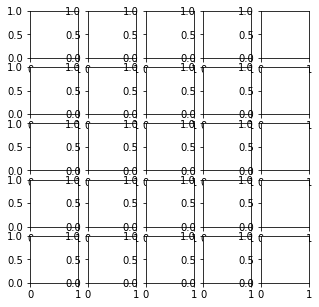

In [7]:
face_array=reading_faces_and_displaying()
mean,flatten_Array=performing_pca(face_array) # eigen_values,eigen_vectors
substract_mean_from_original = np.subtract(flatten_Array, mean)
U, s, V = np.linalg.svd(substract_mean_from_original, full_matrices=False)
Eigen_faces=[]
for x in range(V.shape[0]):
    fig=np.reshape(V[x],(425,425))
    Eigen_faces.append(fig)
print("EIGEN FACES")
display_all(Eigen_faces)